In [31]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
[df1_2, df1_3, df1_4, df1_5] = pickle.load(open('datasets/MVResultsSess01.pickle','rb'))

In [33]:
[df2_2, df2_3, df2_4, df2_5] = pickle.load(open('datasets/MVResultsSess02.pickle','rb'))

In [34]:
def standard_deviation(df):
    matrix = df.iloc[:-2, :].values
    std = np.std(matrix, axis=0)
    print(std[:-1])

In [35]:
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

In [36]:
def plot(df, sess, n):

    if sess==1:
        ylim = 0.08
    elif sess == 2:
        ylim = 0.12


    AIRM = df['AIRM CSP'][:-2]
    LEM = df['LEM CSP'][:-2]
    CLASSIC = df['Classic CSP'][:-2]

    diffLEM = LEM - CLASSIC
    diffAIRM = AIRM - CLASSIC


    title = "Session " + str(sess) + ", AIRM, n="+str(n)

    plt.figure()
    plt.xlim(-35, 35)
    plt.ylim(0, ylim)
    plt.title(title)
    ax = sns.distplot(diffAIRM, kde=True, hist=False, color='black')
    ax.set(xlabel = None)
    ax.set(ylabel = None)
    line = ax.get_lines()[0]
    x, y = line.get_data()  

    y_max = max(y)

    total_area = integrate(x, y)

    mask = x >= 0
    x_after, y_after = x[mask], y[mask]
    area_after = integrate(x_after, y_after)

    mask = x < 0

    x_before, y_before = x[mask], y[mask]
    area_before = total_area - area_after

    mass_before = area_before/total_area
    mass_after = area_after/total_area
    
    plt.text(-20, y_max/2, str(round(100*mass_before,2)) + "%", fontsize='large')
    plt.text(10, y_max/2, str(round(100*mass_after,2)) + "%", fontsize='large')


    plt.plot([0, 0], [0, y_after[0]-0.0008], 'k')
    ax.fill_between(x_after, y1=y_after, alpha=0.5, facecolor='grey')
    plt.savefig('./figures/AIRM'+'_'+str(sess)+'_'+str(n))
    plt.show()   

    print('\n')

    title = "Session " + str(sess) + ", LEM, n="+str(n)

    plt.figure()
    plt.title(title)
    plt.xlim(-35, 35)
    plt.ylim(0, ylim)
    ax = sns.distplot(diffLEM, kde=True, hist=False, color='black')
    ax.set(xlabel = None)
    ax.set(ylabel = None)
    line = ax.get_lines()[0]
    x, y = line.get_data() 
    y_max = max(y)


    total_area = integrate(x, y)

    mask = x >= 0
    x_after, y_after = x[mask], y[mask]
    area_after = integrate(x_after, y_after)

    mask = x < 0

    x_before, y_before = x[mask], y[mask]
    area_before = total_area - area_after

    mass_before = area_before/total_area
    mass_after = area_after/total_area
    
    plt.text(-20, y_max/2, str(round(100*mass_before,2)) + "%", fontsize='large')
    plt.text(10, y_max/2, str(round(100*mass_after,2)) + "%", fontsize='large')


    plt.plot([0, 0], [0, y_after[0]-0.0008], 'k')
    ax.fill_between(x_after, y1=y_after, alpha=0.5, facecolor='grey')
    plt.savefig('./figures/LEM'+'_'+str(sess)+'_'+str(n))
    plt.show()    
    

# Session 1

## n = 2

In [37]:
standard_deviation(df1_2)

[12.23831712 13.79231859 13.87149528]


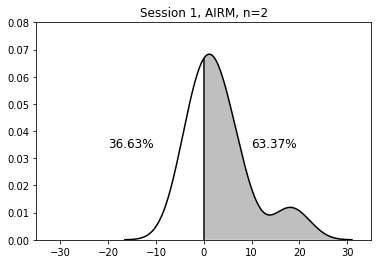

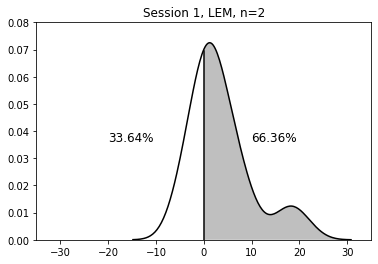

In [38]:
plot(df1_2, 1, 2)

## n = 3

In [39]:
standard_deviation(df1_3)

[13.05525676 13.71288481 13.59227722]


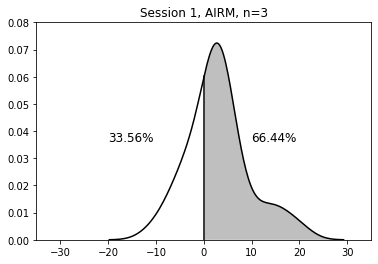

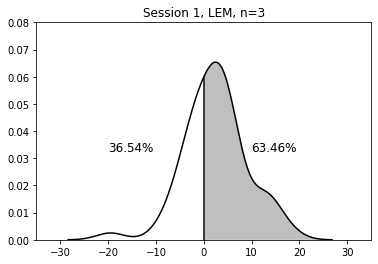

In [40]:
plot(df1_3, 1, 3)

## n = 4

In [41]:
standard_deviation(df1_4)

[13.05344414 13.96006761 13.71896048]


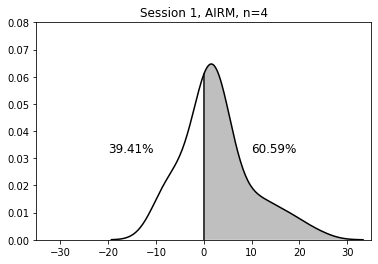

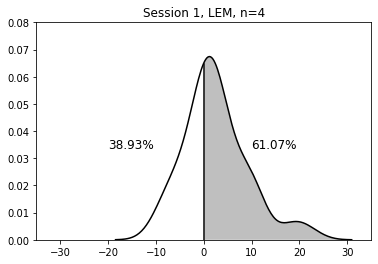

In [42]:
plot(df1_4, 1, 4)

## n = 5

In [43]:
standard_deviation(df1_5)

[12.98610368 14.01544807 13.57657814]


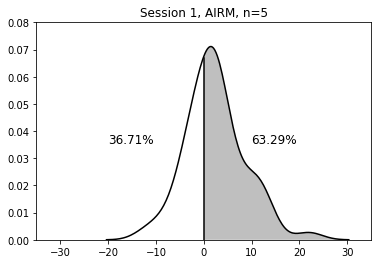

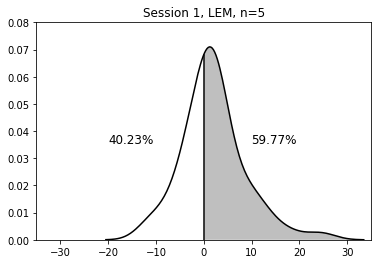

In [44]:
plot(df1_5, 1, 5)

# Session 2 

## n = 2 

In [45]:
standard_deviation(df2_2)

[15.61242086 15.41682238 15.1823168 ]


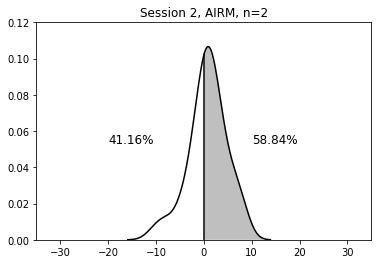

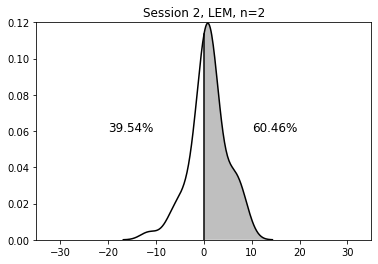

In [46]:
plot(df2_2, 2, 2)

## n = 3

In [47]:
standard_deviation(df2_3)

[15.71569904 15.33748155 15.08536807]


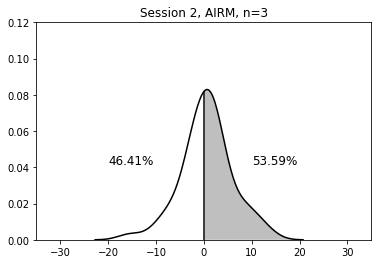

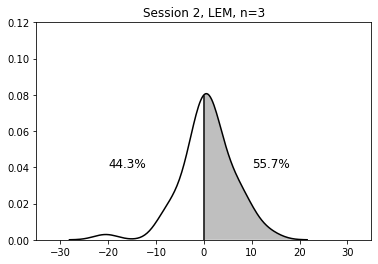

In [48]:
plot(df2_3, 2, 3)

## n = 4

In [49]:
standard_deviation(df2_4)

[15.63894371 14.95512549 14.72761665]


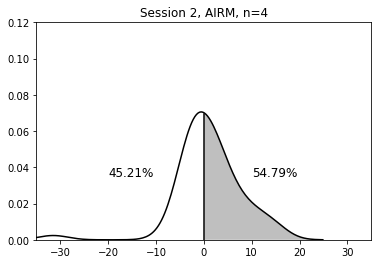

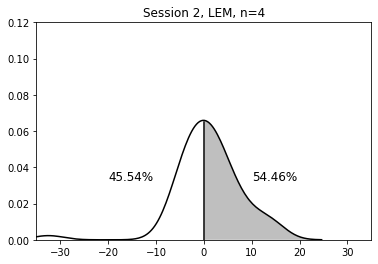

In [50]:
plot(df2_4, 2, 4)

## n = 5

In [51]:
standard_deviation(df2_5)

[15.23997568 14.7846916  14.92318293]


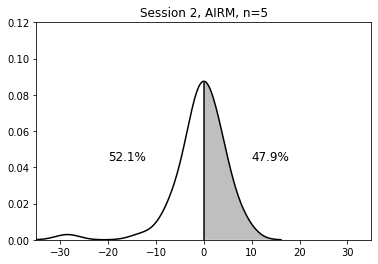

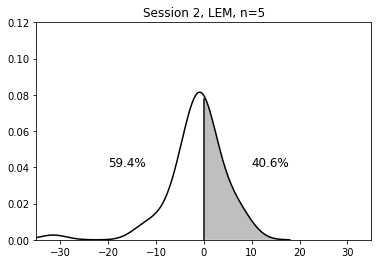

In [52]:
plot(df2_5, 2, 5)